In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot
from keras.optimizers import SGD
np.set_printoptions(threshold=np.sys.maxsize)

In [6]:
#define the data
FullData = pd.read_csv("C17_Correction_Data.csv")

x, y = FullData.values[:, 2:-2], FullData.values[:, -2:]
x_train, x_test, inity_train, inity_test = train_test_split(x, y, test_size=0.3333)
print(x_train.shape, x_test.shape, inity_train.shape, inity_test.shape)
n_features = x_train.shape[1]

(46669, 5) (23331, 5) (46669, 2) (23331, 2)


In [7]:
y_test = [0]*inity_test.shape[0]
for item in range(0,len(inity_test)):
    y_test[item] = str(inity_test[item][0]) + str(inity_test[item][1])
    if(y_test[item] == "00"):
        y_test[item] = 0;
    elif(y_test[item] == "01"):
        y_test[item] = 1;
    elif(y_test[item] == "10"):
        y_test[item] = 2;
    elif(y_test[item] == "11"):
        y_test[item] = 3;
    else:
        print("uhoh1")

y_test = np.array(y_test)

y_train = [0]*inity_train.shape[0]
for item in range(0,len(inity_train)):
    y_train[item] = str(inity_train[item][0]) + str(inity_train[item][1])
    if(y_train[item] == "00"):
        y_train[item] = 0;
    elif(y_train[item] == "01"):
        y_train[item] = 1;
    elif(y_train[item] == "10"):
        y_train[item] = 2;
    elif(y_train[item] == "11"):
        y_train[item] = 3;
    else:
        print("uhoh2")
y_train = np.array(y_train)

# one hot encode output variable
y_traininput = tf.keras.utils.to_categorical(y_train)
y_testinput = tf.keras.utils.to_categorical(y_test)

In [8]:
# define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(n_features,), activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

opt = SGD(lr=0.01)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_traininput, epochs=1, verbose=1)#validation_data=(x_test, y_test), epochs=100, verbose=1)

1459/1459 [==============================] - 2s 985us/step - loss: 7.1704e-07 - accuracy: 1.0000


Train: 1.000, Test: 1.000


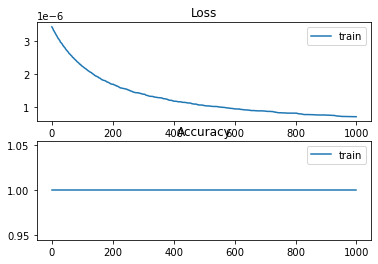

In [11]:
_, train_acc = model.evaluate(x_train, y_traininput, verbose=0)
_, test_acc = model.evaluate(x_test, y_testinput, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [12]:
with open('C17Correctionmodel.pkl', 'wb') as f:
    pickle.dump({'weights': model.get_weights(), 'history': history.history}, f)

In [9]:
# load the weights and history from the file and evaluate the model
with open('C17Correctionmodel.pkl', 'rb') as f:
    data = pickle.load(f)
model.set_weights(data['weights'])

In [11]:
predictions = model.predict(x_test)
y_pred_classes = np.argmax(predictions, axis=1)

# compute class-wise accuracy and confusion matrix
class_0_correct = 0
class_0_total = 0

class_0_true_0 = 0
class_0_false_1 = 0
class_0_false_2 = 0
class_0_false_3 = 0

class_1_correct = 0
class_1_total = 0
class_1_true_1 = 0
class_1_false_0 = 0
class_1_false_2 = 0
class_1_false_3 = 0

class_2_correct = 0
class_2_total = 0
class_2_true_2 = 0
class_2_false_0 = 0
class_2_false_1 = 0
class_2_false_3 = 0

class_3_correct = 0
class_3_total = 0
class_3_true_3 = 0
class_3_false_0 = 0
class_3_false_1 = 0
class_3_false_2 = 0

for i in range(len(y_test)):
    true_class = y_test[i]
    pred_class = y_pred_classes[i]
    if true_class == 0:
        if pred_class == 0:
            class_0_correct += 1
            class_0_true_0 += 1
        elif pred_class == 1:
            class_0_false_1 += 1
        elif pred_class == 2:
            class_0_false_2 += 1
        elif pred_class == 3:
            class_0_false_3 += 1
        else:
            print("class 0 else")
        class_0_total += 1
        
    elif true_class == 1:
        if pred_class == 0:
            class_1_false_0 += 1
        elif pred_class == 1:
            class_1_correct += 1
            class_1_true_1 += 1
        elif pred_class == 2:
            class_1_false_2 += 1
        elif pred_class == 3:
            class_1_false_3 += 1
        else:
            print("class 1 else")
        class_1_total += 1
        
    elif true_class == 2:
        if pred_class == 0:
            class_2_false_0 += 1
        elif pred_class == 1:
            class_2_false_1 += 1
        elif pred_class == 2:
            class_2_correct += 1
            class_2_true_2 += 1
        elif pred_class == 3:
            class_2_false_3 += 1
        else:
            print("class 2 else")
        class_2_total += 1
    
    elif true_class == 3:
        if pred_class == 0:
            class_3_false_0 += 1
        elif pred_class == 1:
            class_3_false_1 += 1
        elif pred_class == 2:
            class_3_false_2 += 1
        elif pred_class == 3:
            class_3_correct += 1
            class_3_true_3 += 1
        else:
            print("class 3 else")
        class_3_total += 1
    
    else:
        print("class else")

class_0_accuracy = class_0_correct / (class_0_total)
class_1_accuracy = class_1_correct / (class_1_total)
class_2_accuracy = class_2_correct / (class_2_total)
class_3_accuracy = class_3_correct / (class_3_total)

print("Class 0:")
print(f"  Total: {class_0_total}")
print(f"  Correct: {class_0_correct}")
print(f"  True 0: {class_0_true_0}")
print(f"  False 1: {class_0_false_1}")
print(f"  False 2: {class_0_false_2}")
print(f"  False 3: {class_0_false_3}")
print(f"  Accuracy: {class_0_accuracy}")

print("Class 1:")
print(f"  Total: {class_1_total}")
print(f"  Correct: {class_1_correct}")
print(f"  True 1: {class_1_true_1}")
print(f"  False 0: {class_1_false_0}")
print(f"  False 2: {class_1_false_2}")
print(f"  False 3: {class_1_false_3}")
print(f"  Accuracy: {class_1_accuracy}")

print("Class 2:")
print(f"  Total: {class_2_total}")
print(f"  Correct: {class_2_correct}")
print(f"  True 2: {class_2_true_2}")
print(f"  False 0: {class_2_false_0}")
print(f"  False 1: {class_2_false_1}")
print(f"  False 3: {class_2_false_3}")
print(f"  Accuracy: {class_2_accuracy}")

print("Class 3:")
print(f"  Total: {class_3_total}")
print(f"  Correct: {class_3_correct}")
print(f"  True 3: {class_3_true_3}")
print(f"  False 0: {class_3_false_0}")
print(f"  False 1: {class_3_false_1}")
print(f"  False 2: {class_3_false_2}")
print(f"  Accuracy: {class_3_accuracy}")

Class 0:
  Total: 6571
  Correct: 6571
  True 0: 6571
  False 1: 0
  False 2: 0
  False 3: 0
  Accuracy: 1.0
Class 1:
  Total: 3602
  Correct: 3602
  True 1: 3602
  False 0: 0
  False 2: 0
  False 3: 0
  Accuracy: 1.0
Class 2:
  Total: 3597
  Correct: 3597
  True 2: 3597
  False 0: 0
  False 1: 0
  False 3: 0
  Accuracy: 1.0
Class 3:
  Total: 9561
  Correct: 9561
  True 3: 9561
  False 0: 0
  False 1: 0
  False 2: 0
  Accuracy: 1.0
